In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import matplotlib.pyplot as plt

In [17]:
num_data = 1000
num_epoch = 10000

noise = init.normal_(torch.FloatTensor(num_data, 1), std=1)
x = init.uniform_(torch.Tensor(num_data, 1), -15, 15)
y = (x**2) + 3
y_noise = y + noise

In [18]:
model = nn.Sequential(
    nn.Linear(1,6),
    nn.ReLU(),
    nn.Linear(6,10),
    nn.ReLU(),
    nn.Linear(10,6),
    nn.ReLU(),
    nn.Linear(6,1),
)

loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(),lr=0.0002)


In [19]:
loss_array = []
for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(x)
    
    loss = loss_func(output,y_noise)
    loss.backward()
    optimizer.step()
    
    loss_array.append(loss.detach().numpy())
    
    


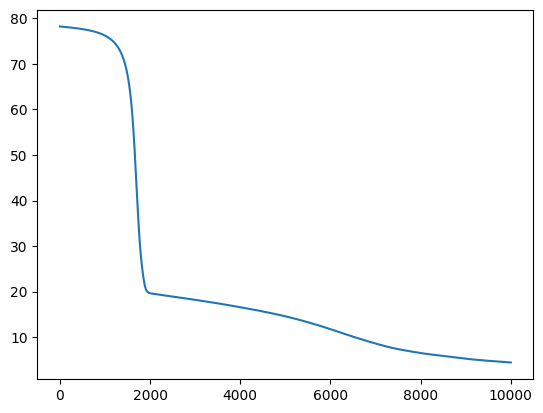

In [20]:
plt.plot(loss_array)
plt.show()

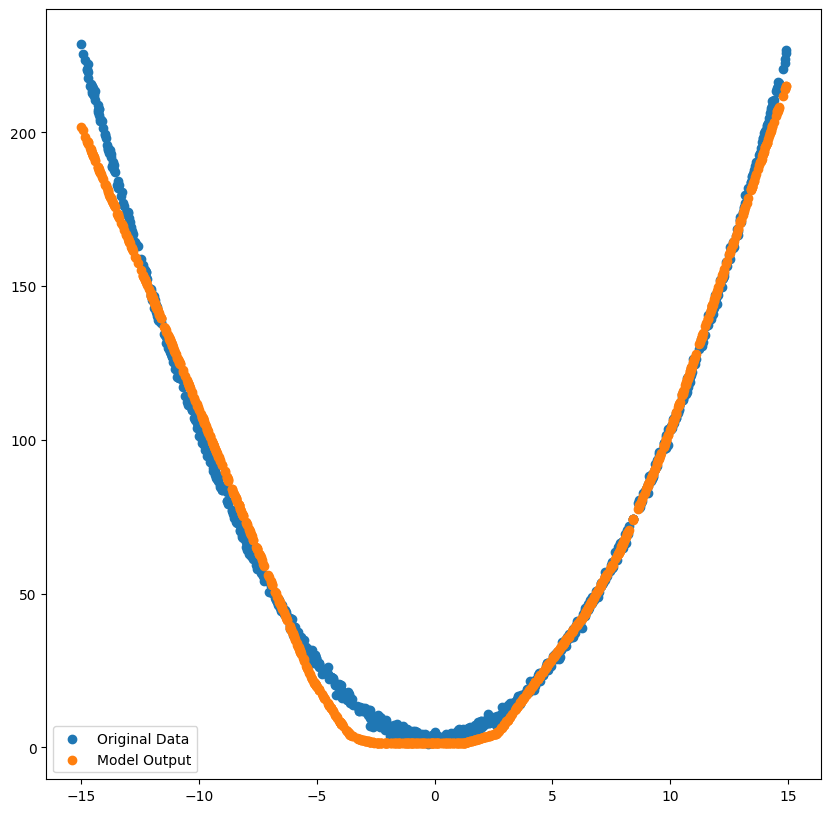

In [21]:
plt.figure(figsize=(10,10))
plt.scatter(x.detach().numpy(),y_noise,label="Original Data")
plt.scatter(x.detach().numpy(),output.detach().numpy(),label="Model Output")
plt.legend()
plt.show()